**TRABAJO NÚMERO 1**

En este trabajo se consideran dos ecuaciones diferenciales no lineales correspondientes al flujo de un canal bidimensional donde las incógnitas hidráulicas son la altura del canal (carga) y la velocidad, se resolverá numéricamente mediante el Método de [Runge-Kutta](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta) de cuarto orden en Python, se hallan las soluciones y pasaremos a graficarlos para poder analizar el comportamiento de las variables analizadas a partir de los resultados numéricos obtenidos. 

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Wwf7HrjPcTM")

**DESCRIPCIÓN DEL PROBLEMA**

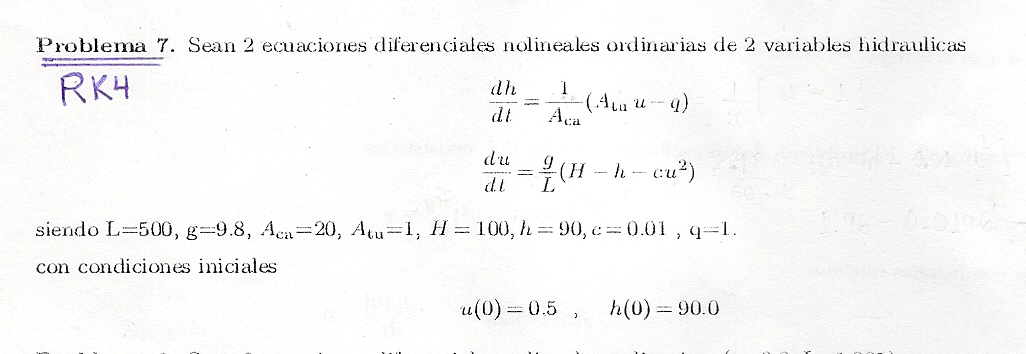

In [2]:
from IPython.display import Image
Image("https://equisimo.files.wordpress.com/2016/05/runge-kutta.jpg")

El problema trata de la evaluación de la velocidad en un sector de un canal, con respecto a la carga y la variación de tiempo, Las dos ecuaciones no lineales ordinarias que gobiernas a estas dos variables hidráulicas son:

 $$ \frac{dh}{dt} = \frac{1}{A_{ca}}({A_{tu}u - q}) $$
 
  $$ \frac{du}{dt} = \frac{g}{L}({H-h-cu^2}) $$
    
 siendo:
 
 $L = 500$
 
 $g = 9.81$
 
 $A_{ca} = 20$
 
 $A_{tu} = 1$
 
 $H = 100$
 
 $h = 90$
 
 $c = 0.01$
 
 $q = 1$
 
 condiciones iniciales: 
 $$ u(0) = 0.5$$   
 $$h(0) = 90.0$$
 

Utilizaremos el siguiente seudocódigo para Python :

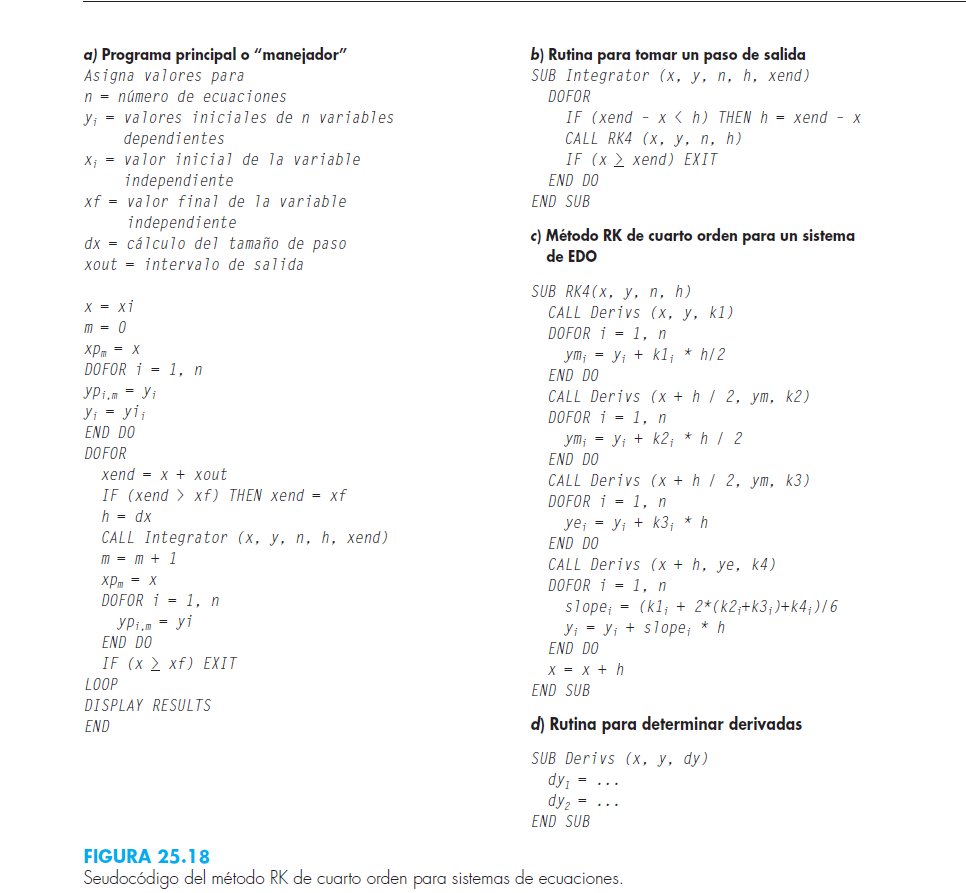

In [3]:
from IPython.display import Image
Image("https://equisimo.files.wordpress.com/2016/05/rungekutta.png")

In [4]:
# Importamos la libreria NumPy
import numpy as np

**d) Rutina para determinar derivadas**

In [5]:
# Valores:
L = 500.0
g = 9.8
Aca = 20.0
Atu = 1.0
H = 100.0
h = 90.0
c = 0.01
q = 1.0


def f1(x,y1,y2):
    return  (1/Aca)*(Atu*y2 - q)


def f2(x,y1,y2):
    return (g/L)*(H - y1 -c*y2**2)


def Derivs(n ,x ,y ,f1 ,f2):
    dy = np.zeros(n)
    dy[0] = f1(x,y[0],y[1])
    dy[1] = f2(x,y[0],y[1])
    return dy


In [6]:
y = np.array([1,2],dtype=float)
Derivs(2, 1 ,y , f1, f2)

array([ 0.05    ,  1.939616])

**C) Método RK de cuarto orden para un sistema de EDO**

In [7]:
def RK4(x,y,n,h,f1,f2):
    ym = np.zeros(n)
    ye = np.zeros(n)
    slope = np.zeros(n)
    
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    
    k1 = Derivs(n ,x ,y ,f1 ,f2)
    for ii in range(0,n):
        ym[ii] = y[ii] + k1[ii]*(h/2)
        
    k2 = Derivs(n ,x + h/2 ,ym ,f1 ,f2)
    for ii in range(0,n):
        ym[ii] = y[ii] + k2[ii]*(h/2)
        
    k3 = Derivs(n ,x + h/2 ,ym ,f1 ,f2)
    for ii in range(0,n):
        ye[ii] = y[ii] + k3[ii]*h
        
    k4 = Derivs(n ,x + h ,ye ,f1 ,f2)
    for ii in range(0,n):
        slope[ii] = (k1[ii] + 2 * (k2[ii] + k3[ii] ) + k4[ii])/6
        y[ii] = y[ii] + slope[ii]*h
        
    x = x + h   
    return x, y

In [8]:
[x, y] = RK4(1,y,2,0.5,f1,f2)
x , y

(1.5, array([ 1.03711956,  2.96942517]))

** b) Rutina para tomar un paso de salida**

In [9]:
def integrator(x,y,n,h,xend,f1,f2):
    while (x < xend):
        if (xend - x < h ):
            h = xend - x
            
        [x, y] = RK4(x,y,n,h,f1,f2)
            
    return x, y

**a) Programa principal o "manejador"**

In [10]:
n = 2 # número de ecuaciones
y0 = np.zeros(n) # Valores inciales de 2 variables dependientes
xp = np.zeros([1,10000000])
y = np.zeros(n)
m = 1
yp = np.zeros([n,10000000])
y0 = [90,0.5]
xi = 0. # valor inicial de la variable independiente
xf = 400. # valor final de la variable independiente
dx = 0.5 # tamaño de paso
x = xi
m = 0
xp[0,m] = x
#yp = np.zeros([n,1])
for i in range(0,2):
    m = 0
    yp[i,m] = y0[i]
    y[i] = y0[i]

#yp = np.zeros([n,100])
for i in range(0,2):
    m = 0
    yp[i,m] = y0[i]
    y[i] = y0[i]

while x < xf:
    xend = x + dx
    if xend > xf:
        xend = xf
    h = dx
        
    [x,y] = integrator(x,y,n,h,xend,f1,f2)
    m = m + 1
    xp[0,m]  = x
    for j in range(n):
        yp[j,m] = y[j]
            

for ii in range(m+1):
    print("%4.1f %10.6f %+12.6e" % (xp[0,ii], yp[0,ii], yp[1,ii]))

 0.0  90.000000 +5.000000e-01
 0.5  89.988725 +5.980276e-01
 1.0  89.979902 +6.961422e-01
 1.5  89.973533 +7.943179e-01
 2.0  89.969618 +8.925287e-01
 2.5  89.968159 +9.907486e-01
 3.0  89.969156 +1.088952e+00
 3.5  89.972606 +1.187112e+00
 4.0  89.978511 +1.285204e+00
 4.5  89.986866 +1.383201e+00
 5.0  89.997670 +1.481078e+00
 5.5  90.010919 +1.578808e+00
 6.0  90.026609 +1.676366e+00
 6.5  90.044735 +1.773727e+00
 7.0  90.065293 +1.870864e+00
 7.5  90.088276 +1.967753e+00
 8.0  90.113678 +2.064367e+00
 8.5  90.141492 +2.160681e+00
 9.0  90.171710 +2.256670e+00
 9.5  90.204323 +2.352309e+00
10.0  90.239322 +2.447573e+00
10.5  90.276698 +2.542436e+00
11.0  90.316440 +2.636874e+00
11.5  90.358538 +2.730863e+00
12.0  90.402980 +2.824377e+00
12.5  90.449753 +2.917393e+00
13.0  90.498845 +3.009886e+00
13.5  90.550242 +3.101832e+00
14.0  90.603932 +3.193207e+00
14.5  90.659898 +3.283988e+00
15.0  90.718126 +3.374152e+00
15.5  90.778600 +3.463674e+00
16.0  90.841304 +3.552532e+00
16.5  90.9

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**FIGURA 1**

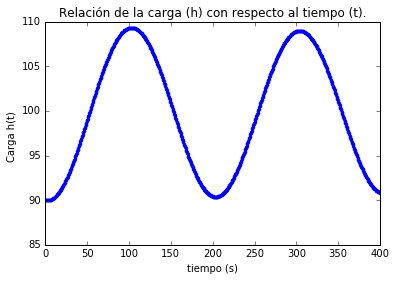

In [12]:
#plt.plot(xp[0,0:m+1], yp[0,0:m+1],yp[1,0:m+1],'or', label = 'Función f(x)')
plt.plot(xp[0,0:m+1], yp[0,0:m+1],'b.-')
plt.title('Relación de la carga (h) con respecto al tiempo (t).')
plt.xlabel('tiempo (s)')
plt.ylabel('Carga h(t)  ')

**FIGURA 2**

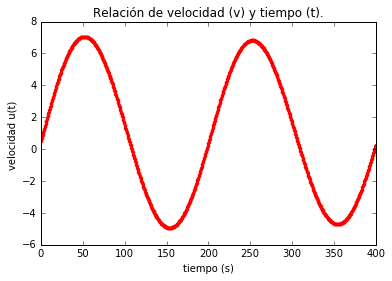

In [13]:
plt.plot(xp[0,0:m+1], yp[1,0:m+1],'r.-')
plt.title('Relación de velocidad (v) y tiempo (t).')
plt.xlabel('tiempo (s)')
plt.ylabel('velocidad u(t) ')

** FIGURA 3 **

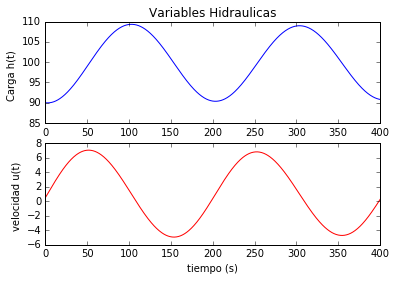

In [14]:

plt.subplot(2, 1, 1)
plt.plot(xp[0,0:m+1], yp[0,0:m+1],'b')
plt.title('Variables Hidraulicas')
plt.ylabel('Carga h(t)  ')

plt.subplot(2, 1, 2)
plt.plot(xp[0,0:m+1], yp[1,0:m+1],'r')
plt.xlabel('tiempo (s)')
plt.ylabel('velocidad u(t) ')

plt.show()

**CONCLUSIONES**

Con estos resultados numéricos, podemos concluir que la velocidad del fluido (Figura 2) y la carga del canal (Figura 1) oscilan con respecto al tiempo, en el estudio de las dos ecuaciones no lineales.  También podemos observar en los resultados gráficos  que el perfil generado por la Figura 3. Es un perfil senoidal en los 400 primeros segundos para ambas soluciones.



**LITERATURA**

*  CHAPRA, Steve y Canale.
  2006	*[Métodos numéricos para Ingenieros](https://equisimo.wordpress.com/2016/03/19/metodos-numericos-chapra-quinta-edicion/)*. Traducción de Javier Enrique Brito. Quinta Edición. Mexico, D.F.: McGRAW-HILL/INTERAMERICANA EDITORES, S.A. 
  

* CERETANI, Andrea, Sanziel y Portapila
2015	*[Resolución numérica del problema del flujo en un canal con escalón utilizando OpenFOAM](www.ina.gov.ar/pdf/ifrrhh/04_020_Ceretani.pdf)*. CIFASIS. Rosario,Argentina.


   **CÒDIGO**

* [Runge-Kutta Python](https://github.com/alexander14rc/Programas/blob/master/C%C3%B3digo%20Runge-Kutta.ipynb)
* [Runge-Kutta Fortran](https://github.com/alexander14rc/Metodos-II---FORTRAN/tree/master/RungeKutta)
* [Runge-Kutta Matlab](https://github.com/alexander14rc/MetodosI-MATLAB/tree/master/Runge%20Kutta%204/RK4%202EDO)

**Autor**

* [alexander14rc](https://equisimo.wordpress.com/author/alexander14ruiz/)

**PÀGINAS WEB Y BLOGS **
* [MECA UNMSM](https://www.facebook.com/mecaunmsm/)
* [EQUISIMO](https://equisimo.wordpress.com/)